In [69]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import os
import locale
locale.setlocale(locale.LC_ALL,'en_US.utf8')

Cp = 1005

In [2]:
XTIMEF = np.arange(0,37*1800,1800)
XSFTH = np.array([12.30,16.20,28.90,41.60,79.10,116.70,159.0,201.20,247.60,294.0,315.90,337.70,331.20,324.60, 320.60,316.60,290.70,264.80,222.40,180.0,141.5,103.0, 86.5,70.0,50.90,31.90,25.40,19.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
# CSFTQ="W/m2",
CSFTQ= np.array([1.20,1.60,2.90,4.20,7.90,11.70,15.90,20.10,24.80,29.40,31.60,33.80,33.10,32.5,32.10,31.70,29.10,26.5,19.90,13.40,11.80,10.30,8.70,7.0,5.10,3.20,2.5,1.90,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [3]:
#colors = ['tab:blue','tab:orange','tab:green','tab:red']

#simus = ['A0W0V','ATRI2','AMO20','AMOPL']
#segs = ['S200m','S200m','M200m','M200m']

#simus = ['CFLAT','CF500','CTRI2','CMO10','CMOPL']
#segs = ['S100m','S100m','M100m','M100m','M100m']

colors = ['tab:blue','tab:cyan','tab:green','tab:orange','tab:red']
simus = ['DFLAT','DF500','DMO10','DTRI2','DMOPL']
segs = ['M100m','M100m','M100m','M100m','M100m']

userPath = '/home/philippotn'
# userPath = '/cnrm/tropics/user/philippotn'

/tmp/ipykernel_22797/3523143154.py:59: RuntimeWarning: invalid value encountered in divide
  ax.plot(Cp*f['ALPHA_s'].data[it]/f['ALPHA'].data[it]*f['RHO'].data[it]*f['W_s'].data[it]*(f['TH_s'].data[it]-f['TH_e'].data[it]),z,color=colors[i],linestyle='--')


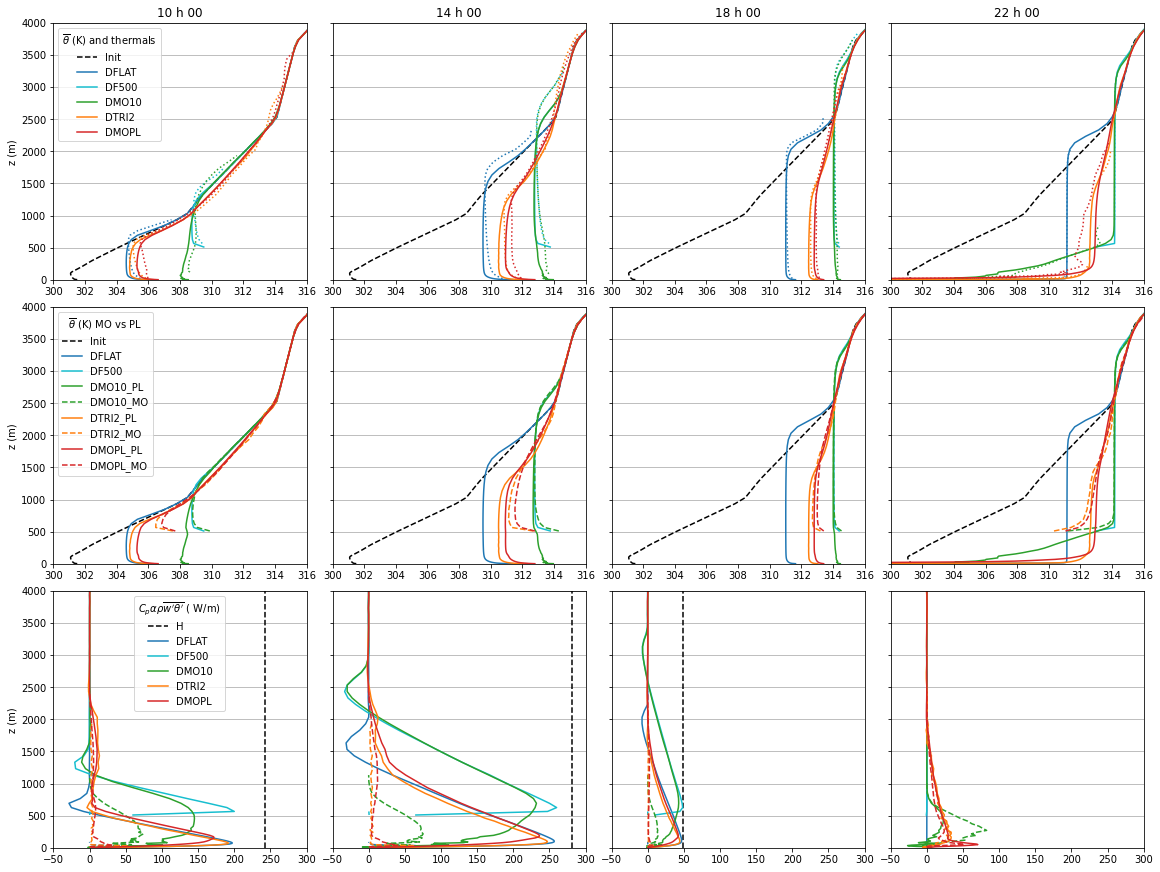

In [82]:
its = [3,7,11,15]
ncols,nrows = len(its),3
fig,axs = plt.subplots(ncols=ncols,nrows=nrows,figsize=(4*ncols,4*nrows),constrained_layout=True)
ft = 10
for i,simu in enumerate(simus):
    if userPath == '/home/philippotn':
        dataPath = userPath+'/Documents/NO_SAVE/'
    else:
        dataPath = userPath+'/LES_'+simu+'/NO_SAVE/'
    f = xr.open_dataset(dataPath+simu+'_'+segs[i]+'_mean.nc')
    z = f['z']
    for j,it in enumerate(its):
        ax = axs[0,j]
        if i==0:
            ax.set_title('{:02d} h {:02d}'.format(int(f.time[it].dt.hour),int(f.time[it].dt.minute)))
            ax.plot(f['TH'].data[0],z,'--k',label='Init')
            if j==0:
                ax.set_ylabel('z (m)')
            else:
                ax.set_yticklabels([])
            ax.grid(axis='y')
            ax.set_xlim([300,316])
            ax.set_ylim([0,4000])
        ax.plot(f['TH'].data[it],z,color=colors[i],label=simu)
        ax.plot(f['TH_t'].data[it],z,color=colors[i],linestyle=':')
        
        ax = axs[1,j]
        if i==0:
            ax.plot(f['TH'].data[0],z,'--k',label='Init')
            if j==0:
                ax.set_ylabel('z (m)')
            else:
                ax.set_yticklabels([])
            ax.grid(axis='y')
            ax.set_xlim([300,316])
            ax.set_ylim([0,4000])
        if 'MO' in f.data_vars:
            ax.plot(f['TH_PL'].data[it],z,color=colors[i],label=simu+'_PL')
            ax.plot(f['TH_MO'].data[it],z,color=colors[i],label=simu+'_MO',linestyle='--')
        else:
            ax.plot(f['TH'].data[it],z,color=colors[i],label=simu)
            
        ax = axs[2,j]
        if i==0:
            ax.axvline(x=f['H'].data[it],color='k',linestyle='--',label='H')
            if j==0:
                ax.set_ylabel('z (m)')
            else:
                ax.set_yticklabels([])
            ax.grid(axis='y')
            ax.set_xlim([-50,300])
            ax.set_ylim([0,4000])
        #ax.plot(Cp*f['ALPHA'].data[it]*f['RHO'].data[it]*f['WTH'].data[it],z,color=colors[i],label=simu)
        #ax.plot(Cp*f['ALPHA_t'].data[it]*f['RHO'].data[it]*f['W_t'].data[it]*(f['TH_t'].data[it]-f['TH_e'].data[it]),z,color=colors[i],linestyle=':')
        #ax.plot(Cp*f['ALPHA_s'].data[it]*f['RHO'].data[it]*f['W_s'].data[it]*(f['TH_s'].data[it]-f['TH_e'].data[it]),z,color=colors[i],linestyle='--')
        #ax.plot(f['TH_t'].data[it],z,color=colors[i],linestyle=':')
        ax.plot(Cp*f['RHO'].data[it]*f['WTH'].data[it],z,color=colors[i],label=simu)
        #ax.plot(Cp*f['ALPHA_t'].data[it]/f['ALPHA'].data[it]*f['RHO'].data[it]*f['W_t'].data[it]*(f['TH_t'].data[it]-f['TH_e'].data[it]),z,color=colors[i],linestyle=':')
        ax.plot(Cp*f['ALPHA_s'].data[it]/f['ALPHA'].data[it]*f['RHO'].data[it]*f['W_s'].data[it]*(f['TH_s'].data[it]-f['TH_e'].data[it]),z,color=colors[i],linestyle='--')
        #
axs[0,0].legend(title="$\overline{\\theta}$ (K) and thermals")#,titlefontsize=20)
axs[1,0].legend(title="$\overline{\\theta}$ (K) MO vs PL")
axs[2,0].legend(title='$C_p \\alpha \\rho \overline{w^{\\prime}\\theta^{\\prime}}$ ( W/m)')


/tmp/ipykernel_22797/682650961.py:29: RuntimeWarning: invalid value encountered in divide
  newterm = alphadot/alpha*( f['H'].data[it]/rho/Cp - wth )


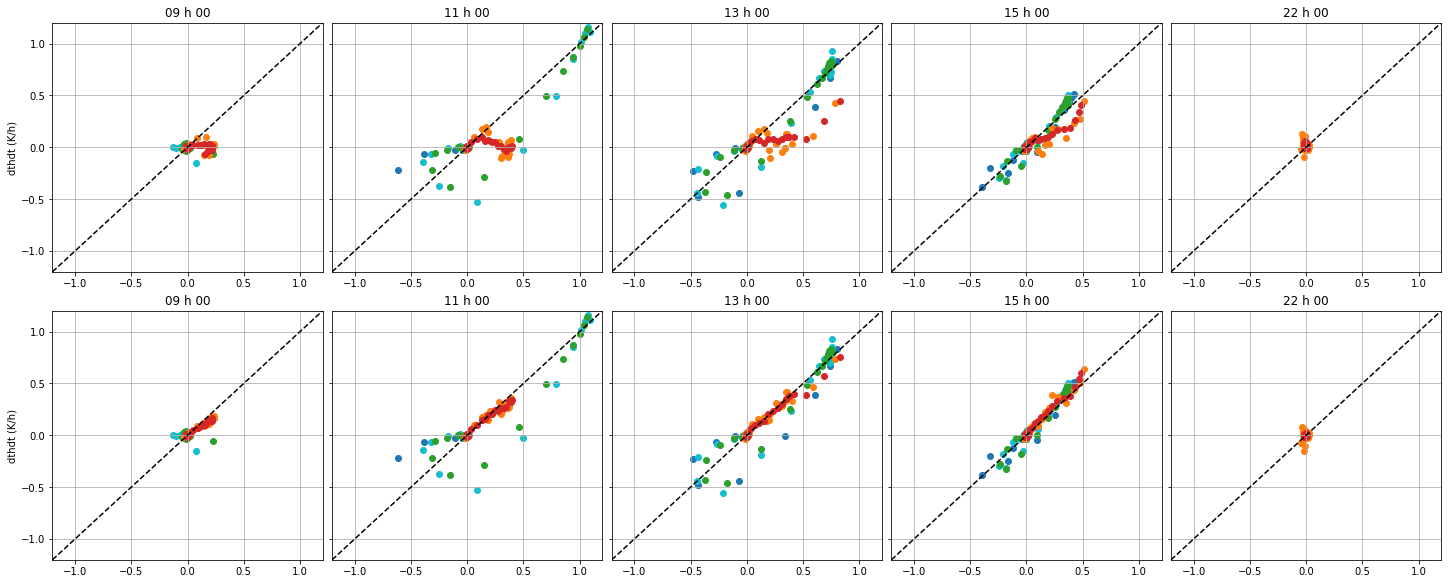

In [85]:
dt = 3600
m = 1.2
iz0 = 35#18
its = [2,4,6,8,15]
ncols,nrows = len(its),2
fig,axs = plt.subplots(ncols=ncols,nrows=nrows,figsize=(4*ncols,4*nrows),constrained_layout=True)
ft = 10
for i,simu in enumerate(simus[:]):
    if userPath == '/home/philippotn':
        dataPath = userPath+'/Documents/NO_SAVE/'
    else:
        dataPath = userPath+'/LES_'+simu+'/NO_SAVE/'
    f = xr.open_dataset(dataPath+simu+'_'+segs[i]+'_mean.nc')
    z = f['z']
    for j,it in enumerate(its):
        
            
        # time variation of mean theta
        dthdt = (f['TH'].data[it+1]-f['TH'].data[it])/dt
        # div of vertical flux
        rho = f['RHO'].data[it]
        wth = f['WTH'].data[it]
        dzflux = -1./rho* (rho*wth-np.roll(rho*wth,1))/(z-np.roll(z,1))
        # new term from orog
        alpha = f['ALPHA'].data[it]
        alphadot = np.copy(alpha)
        alphadot[1:] = (alpha[1:]-alpha[:-1])
        alphadot /= f['dz'].data
        newterm = alphadot/alpha*( f['H'].data[it]/rho/Cp - wth )
        
        for new in range(2):
            ax = axs[new,j]
            if i==0:
                ax.plot([-m,m],[-m,m],'--k')
                ax.set_title('{:02d} h {:02d}'.format(int(f.time[it].dt.hour),int(f.time[it].dt.minute)))
                if j==0:
                    ax.set_ylabel('dthdt (K/h)')
                else:
                    ax.set_yticklabels([])
                ax.grid()
                ax.set_xlim([-m,m])
                ax.set_ylim([-m,m])
            
            if not(new):
                ax.scatter(3600*dthdt[iz0:], 3600*dzflux[iz0:] ,color=colors[i],label=simu)
            else:
                ax.scatter(3600*dthdt[iz0:], 3600*(dzflux[iz0:]+newterm[iz0:]) ,color=colors[i],label=simu)

In [79]:
z[:32]


<xarray.DataArray 'z' (z: 32)>
array([  2.      ,   6.2     ,  10.82    ,  15.902   ,  21.4922  ,  27.64142 ,
        34.405562,  41.846118,  50.03073 ,  59.033803,  68.937183,  79.830902,
        91.813992, 104.995391, 119.49493 , 135.444423, 152.988865, 172.287752,
       193.516527, 216.86818 , 242.554998, 270.810498, 301.891547, 336.080702,
       373.688772, 415.05765 , 460.563415, 510.619756, 565.681732, 626.249905,
       692.874895, 766.162385])
Coordinates:
  * z        (z) float64 2.0 6.2 10.82 15.9 21.49 ... 565.7 626.2 692.9 766.2

In [52]:
f['ALPHA'].data[it-1]

array([0.01295471, 0.03961182, 0.06789017, 0.09689331, 0.12550354,
       0.1566658 , 0.18857193, 0.22263718, 0.25798416, 0.29462814,
       0.33052826, 0.3665123 , 0.4040947 , 0.44379425, 0.48076248,
       0.51155853, 0.52862549, 0.53926849, 0.5490799 , 0.55865479,
       0.56848145, 0.57865524, 0.58929062, 0.60020828, 0.61151886,
       0.623909  , 0.6367569 , 0.65037918, 0.66465759, 0.67987061,
       0.69645691, 0.71417236, 0.73359299, 0.75517273, 0.77922058,
       0.80482483, 0.83079147, 0.85654449, 0.8814621 , 0.90498352,
       0.92615891, 0.94530487, 0.96179199, 0.97497559, 0.98595047,
       0.99372482, 0.99776077, 0.99953461, 0.99996567, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [68]:
#alphadot = np.zeros(len(f['z'])
alphadot = np.copy(f['ALPHA'].data[0])
alphadot[1:] = (f['ALPHA'].data[0,1:]-f['ALPHA'].data[0,:-1])
alphadot /= f['dz'].data
print(np.sum(alphadot*f['dz'].data))

8.470329472543003e-22


KeyError: "No variable named 'BLH_MO'. Variables on the dataset include ['ZS', 'dz', 'a', 'ALPHA', 'RHO', ..., 'THVBL_e', 'time', 'z', 'y', 'x']"

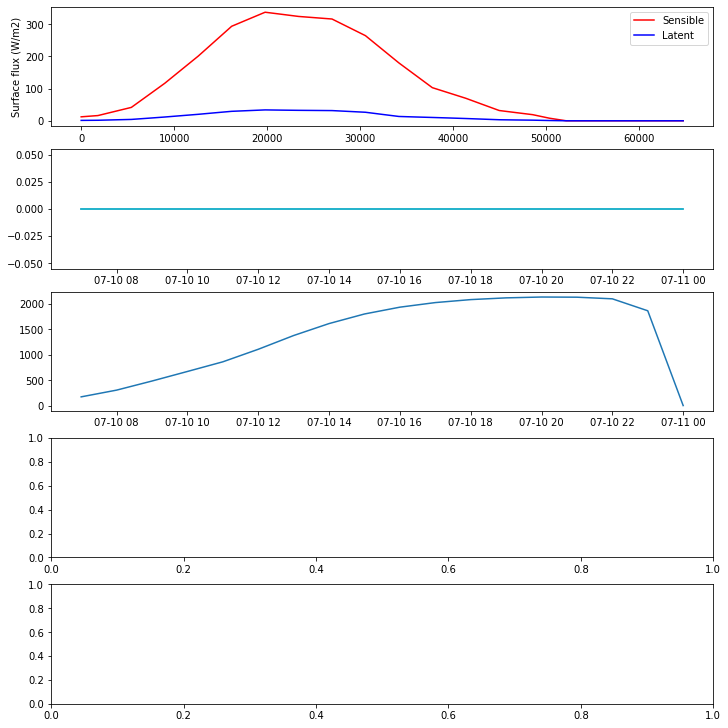

In [62]:


nrows = 5
fig,ax = plt.subplots(nrows=nrows,figsize=(10,2*nrows),constrained_layout=True)
ft = 10

ax[0].plot(XTIMEF,XSFTH,'r',label='Sensible')
ax[0].plot(XTIMEF,CSFTQ,'b',label='Latent')
ax[0].legend()
ax[0].set_ylabel('Surface flux (W/m2)',fontsize=ft)

for i,simu in enumerate(simus):
    if userPath == '/home/philippotn':
        dataPath = userPath+'/Documents/NO_SAVE/'
    else:
        dataPath = userPath+'/LES_'+simu+'/NO_SAVE/'
    
    f = xr.open_dataset(dataPath+simu+'_'+segs[i]+'_mean.nc')
    ZS = f['ZS']
    orog = False if np.all(ZS==0.) else True
    z = f['z']
    theta = f['TH']
    rvap = f['RV']
    cloud_frac = f['CF']
    pressure = f['P']
    temp = theta * (pressure/100000)**(2/7)
    rtracer = f['TR']

    #flux_RHO = f['MO_flux_RHO']

    precip = f['PRS']*3600*100

    time = f['time']
    dt = float(time[1]-time[0])/1e9 # from ns to s
    dx = int(segs[i][1:4])
    
    ax[1].plot(time,precip,label=simu,color=colors[i])
    
    if orog:
        ax[2].plot(time,f['BLH_MO'],linestyle=':',color=colors[i])
        ax[2].plot(time,f['BLH_PL'],linestyle='--',color=colors[i])
    else:
        ax[2].plot(time,f['BLH'],linestyle='-',color=colors[i])
        
    if orog:
        #ax[3].plot(time,f['THVBL_MO']-f['THVBL_PL'],linestyle='-',color=colors[i])
        
        massflux = f['MO_flux_RHO']
        z = np.array(f['z'])
        z_ = np.zeros(len(z)+1)
        z_[1:-1] = (z[1:]+z[:-1])/2
        z_[-1] = 2*z[-1] - z_[-2]
        dz = z_[1:]-z_[:-1]
        
        lower_flux = np.zeros(len(time))
        for it in range(len(time)):
            for ib in range(1,len(z)):
                if massflux[it,ib]*massflux[it,0]<0:
                    break
            lower_flux[it] = dx*np.sum( dz[:ib]*massflux[it,:ib] )
            
        ax[3].plot(time,lower_flux,linestyle='-',color=colors[i])
        
        dTHV = f['THV_MO']-f['THV_PL']
        mean_dTHV_BL = np.zeros(len(time))
        for it in range(len(time)):
            for ib in range(1,len(z)):
                if dTHV[it,ib]*dTHV[it,0]<=0:
                    break
            mean_dTHV_BL[it] = np.sum( dz[:ib]*dTHV[it,:ib] )
            
        ax[4].plot(time,mean_dTHV_BL,linestyle='-',color=colors[i])
                    
            
#ax[1].set_yticks(fontsize=ft)
ax[1].set_ylabel('Precipitations (mm/h)',fontsize=ft)
ax[2].set_ylabel('Mixed layer height (m)',fontsize=ft)
ax[2].set_ylabel('Mixed layer height (m)',fontsize=ft)

for i in range(nrows-1):
    ax[i].set_xticks([])
    
ax[-1].set_xlabel('Time UTC (hours)',fontsize=ft)
hours = matplotlib.dates.HourLocator()
ax[-1].xaxis.set_major_locator(hours)
ax[-1].xaxis.set_major_formatter(matplotlib.dates.ConciseDateFormatter(hours,formats=['%Y', '%b', '%b/%d', '%H', '%H:%M', '%S.%f']))

ax[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=len(simus),fontsize=ft)

In [ ]:
#%%
plt.figure(11,figsize=(17,10),constrained_layout=True)
plt.plot(time,precip,color='b',label="Precipitations")
hours = matplotlib.dates.HourLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(matplotlib.dates.ConciseDateFormatter(hours,formats=['%Y', '%b', '%b/%d', '%H', '%H:%M', '%S.%f']))
ft = 20
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.ylabel('Precipitations (mm/h)',fontsize=ft)
plt.xlabel('Time UTC (hours)',fontsize=ft)

In [47]:

print(dz) 

[ 10.   12.5  20.5  32.5  46.5  62.5  80.5 100.5 122.5 146.5 172.5 193.
 200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.
 200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.
 200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.
 200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.
 200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.
 200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.
 200.  200.  200.  200.  200.  207.5 230.5 262.5 296.5 332.5 370.5 410.5
 452.5 496.5 542.5 578.  590. ]


In [53]:
it = 10
print( np.sum(dz*f['MO_flux_RHO'][it]) / np.sum(dz*np.abs(f['MO_flux_RHO'][it])) )

<xarray.DataArray 'MO_flux_RHO' ()>
array(0.02956045)
Coordinates:
    time     datetime64[ns] 2006-07-10T16:59:00


In [55]:
np.sum(dx*dz*np.abs(f['MO_flux_RHO'][it]))

NameError: name 'dx' is not defined

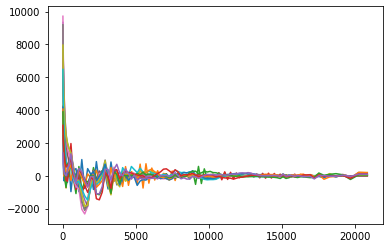

In [57]:
for it in range(15):
    plt.plot(z,f['MO_flux_RHO'][it])
    

In [22]:
f

<xarray.Dataset>
Dimensions:      (y: 512, x: 512, z: 85, time: 18)
Coordinates:
  * time         (time) datetime64[ns] 2006-07-10T07:00:00 ... 2006-07-11
  * z            (z) float64 2.0 6.2 10.82 ... 5.832e+03 5.932e+03 6.032e+03
  * y            (y) float64 50.0 150.0 250.0 ... 5.095e+04 5.105e+04 5.115e+04
  * x            (x) float64 50.0 150.0 250.0 ... 5.095e+04 5.105e+04 5.115e+04
Data variables: (12/129)
    ZS           (y, x) float64 ...
    dz           (z) float64 ...
    a            (y, x) bool ...
    ALPHA        (time, z) float64 0.01295 0.03961 0.06789 ... 1.0 1.0 1.0
    RHO          (time, z) float64 1.145 1.145 1.145 ... 0.6451 0.6382 0.6313
    TH           (time, z) float64 301.5 301.5 301.4 301.4 ... 326.1 326.7 327.2
    ...           ...
    BLH_PL       (time) float64 ...
    THVBL_PL     (time) float64 ...
    MO_flux_RHO  (time, z) float64 ...
    MO_flux_RV   (time, z) float64 ...
    MO_flux_RT   (time, z) float64 ...
    MO_flux_TH   (time, z) float64 ...

In [ ]:
ncols = 5
ft=15

fig, axs = plt.subplots(ncols=ncols,figsize=(15,5))
# fig.figsize = (16, 5)

xlims = [[T0-2,T0+10],[-100,400],[0,5],[0,1],[0,1],[-0.1,0.1]]
xlabels = ['$\\theta$ (K)', '$c_p \\rho \\overline{w^{\prime} \\theta^{\prime}}$ (W/m²)', 'W (m/s)', '$\\alpha$' ]


for i in range(ncols):
    axs[i].set_ylim([0,zmax])
    axs[i].grid(axis='y')
    if i==0:
        axs[i].set_ylabel('z (m)',fontsize=ft)
    else:
        # axs[i].set_yticks([])#,fontsize=0)
        axs[i].set_yticklabels([])
    
    axs[i].set_xlabel(xlabels[i],fontsize=ft)
    axs[i].set_xlim(xlims[i])

axs[0].axvline(x=T0,color='grey',linestyle='-',linewidth=1,label='$\\theta_{ini}$')
line_zi = axs[0].axhline(y=zi[0],color='k',linestyle='--',label='$z_i$')
line_TH, = axs[0].plot([],[],label='$\overline{\\theta}$')
line_THt,= axs[0].plot([],[],label='$\\theta_t$')
line_H = axs[1].axvline(x=H[0],color='k',linestyle='--',label='$H$')
line_EDF,= axs[1].plot([],[],label='$\overline{w^{\prime}\\theta^{\prime}}_{ED}$') 
line_THF,= axs[1].plot([],[],label='$\overline{w^{\prime}\\theta^{\prime}}_{EDMF}$')
line_THF_LES,= axs[1].plot([],[],label='$\overline{w^{\prime}\\theta^{\prime}}^{LES}$')
line_Wstar = axs[2].axvline(x=Wstar[0],color='k',linestyle='--',label='$w_*$')
line_Wt, = axs[2].plot([],[],label='$w_t$') 
line_At, = axs[3].plot([],[],label='$\\alpha_t$')
line_Ft, = axs[4].plot([],[],label='$f_t$') 
line_Et, = axs[5].plot([],[],label='$\\epsilon_t$')
line_Dt, = axs[5].plot([],[],label='$\\delta_t$')

for ax in axs:
    ax.legend()
fig.suptitle("Comparaison des simus")